# Common visualization tools

## Import neceessary modules

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import and export graphs 

### 1a. Export graph to a path with specfic format 

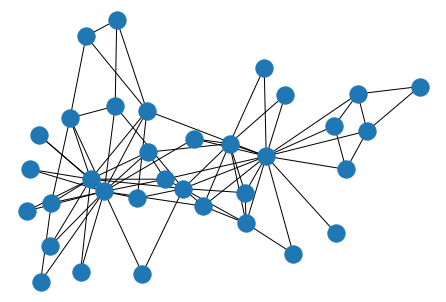

In [2]:
G = nx.karate_club_graph() # graph generator
nx.write_adjlist(G, "graph.adjlist")  #essentially an array of numvbers which vertices size = array size 

nx.draw(G)
plt.show()

### 1b. Import graph from a path with specfic format

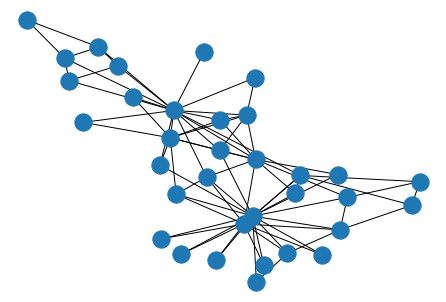

In [3]:
G = nx.read_adjlist("graph.adjlist") 

nx.draw(G)
plt.show()

### 2. Import graph from `.csv`

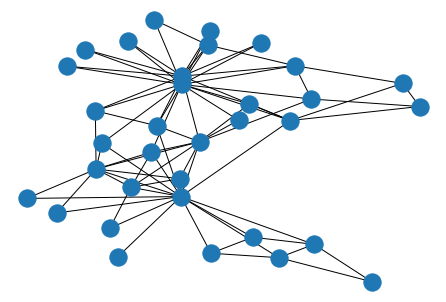

In [4]:
Graphtype = nx.Graph()

df = pd.read_csv('https://raw.githubusercontent.com/memgraph/graph-analytics-course/master/lecture-2/import-export/graph.csv')# raw data from git hub 

G = nx.from_pandas_edgelist(df, create_using=Graphtype)

nx.draw(G)
plt.show()  

### 3. Import graph from `.graphml` and export as `.gpickle`

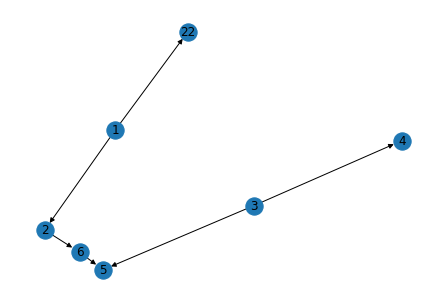

In [5]:
G = nx.read_graphml('graph.graphml.txt')

nx.write_gpickle(G, 'graph.gpickle')
G_imported = nx.read_gpickle('graph.gpickle')

nx.draw(G, with_labels=True)
plt.show()

## Visualization with  matplotlib

### Dodecadedral graph

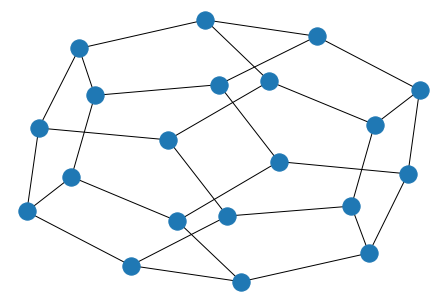

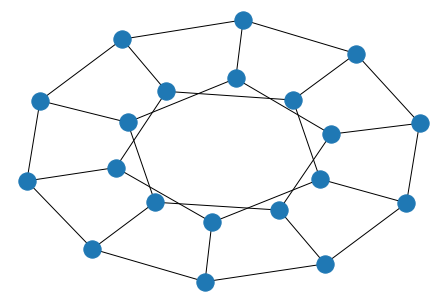

In [6]:
G = nx.dodecahedral_graph()

nx.draw(G)
plt.show()

# This will draw a graph with the same layout (spring layout is the default one)
nx.draw(G, pos=nx.spring_layout(G))
plt.show()

### Directed graph

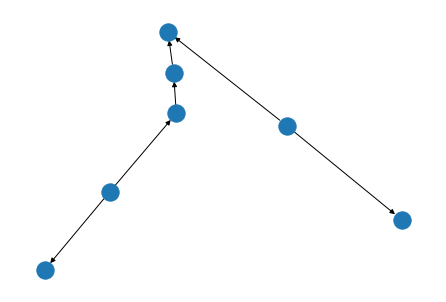

In [7]:
# Importing graphs from a file
G = nx.read_graphml('graph.graphml.txt')

# Draw a directed graph
nx.draw(G)
plt.show()

### Undirected graph (removed from directed)

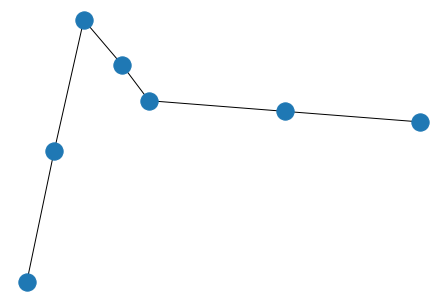

In [8]:
# Importing graphs from a file
G = nx.read_graphml('graph.graphml.txt')

# Draw a directed graph
nx.draw(G, arrows=False)
plt.show()

### Directed graph with labels - only numbers shown in label 

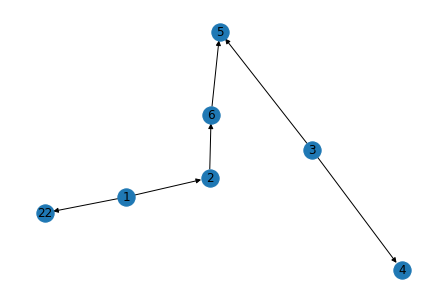

In [9]:
# Importing graphs from a file
G = nx.read_graphml('graph.graphml.txt')

# Draw a directed graph
nx.draw(G, with_labels=True)
plt.show()

### Directed graph with custom node labels

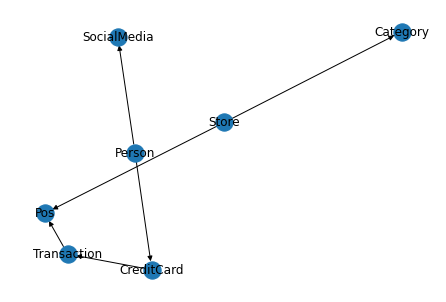

In [27]:
# Importing graphs from a file
G = nx.read_graphml('graph.graphml.txt')

# Draw with custom node labels
pos=nx.spring_layout(G)
nx.draw(G, pos)

node_labels = nx.get_node_attributes(G,'label')
nx.draw_networkx_labels(G, pos, labels = node_labels)

plt.show()

### Directed graph with custom edge labels

[('1', '2', {'type': 'OWNS'}), ('1', '22', {'type': 'HAS_ACCOUNT'}), ('2', '6', {'type': 'HAS_TRANSACTION'}), ('3', '4', {'type': 'IS_OF_CATEGORY'}), ('3', '5', {'type': 'HAS_POS_DEVICE'}), ('6', '5', {'type': 'TRANSACTION_AT'})]


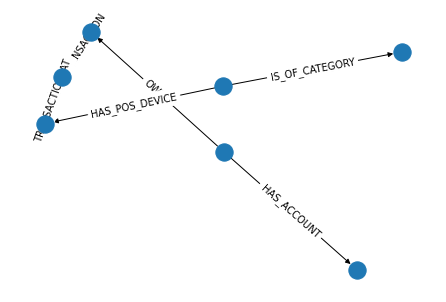

In [11]:
# Importing graphs from a file
G = nx.read_graphml('graph.graphml.txt')

# Draw with custom edge labels
pos=nx.spring_layout(G)
print(G.edges(data=True))
nx.draw(G, pos)

edge_labels = nx.get_edge_attributes(G,'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

plt.show()

### Directed graph with custom node and eddge colors 

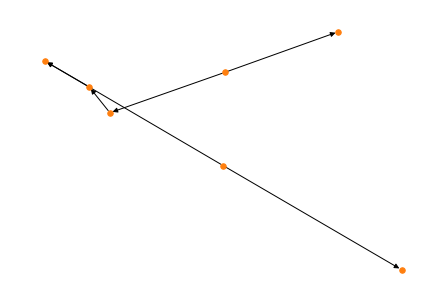

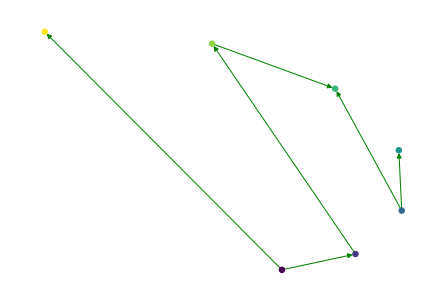

In [12]:
# Importing graphs from a file
G = nx.read_gexf('graph.gexf.txt')

# all noddes the same color 
nx.draw(G,
        node_size=30,
        node_color='C1')

plt.show()

# Defining the node colors for each nodes 
colors = np.linspace(0, 1, len(G.nodes))

layout = nx.spiral_layout(G)

nx.draw(G,
        node_size=30,
        node_color=colors,
        pos=layout,
        edge_color='g')

plt.show()

### Complete bipartite graph - comparing `nx.draw()` vs `nx.draw_network()`

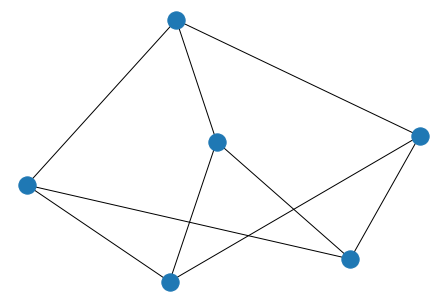

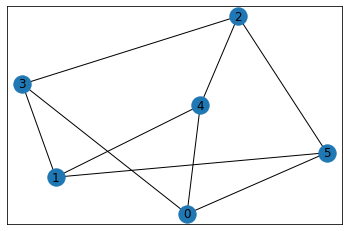

In [13]:
K33 = nx.complete_bipartite_graph(3,3)

# Visualize the graph with the draw() method
nx.draw(K33)
plt.show()

# Visualize the graph with the draw_networkx() method
nx.draw_networkx(K33)
plt.show()

### Complete bipartite graph with custom positions

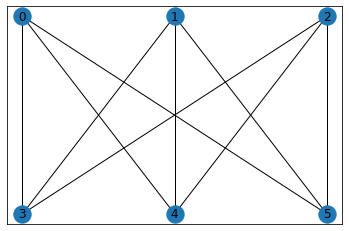

In [14]:
K33 = nx.complete_bipartite_graph(3,3)

positions = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}
nx.draw_networkx(K33, positions)
plt.show()

### Complete bipartite graph with custom options

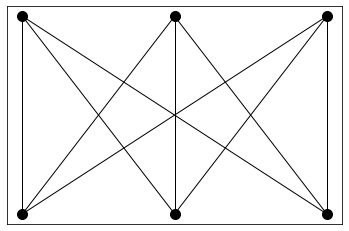

In [15]:
K33 = nx.complete_bipartite_graph(3,3)

positions = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}
options = {'node_size' : 100, 'node_color' : 'k'}
nx.draw_networkx(K33, positions, with_labels=False, **options)
plt.show()

## Visualization with GraphViz

In [16]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

### Simple graph with GraphViz

In [17]:
G = nx.read_gexf('graph.gexf.txt')

A = to_agraph(G)
print(A)
A.layout('dot')
A.draw('graphviz-schema-1.png') #export graph

strict digraph "" {
	graph [edge_default="{}",
		mode=static,
		node_default="{}"
	];
	node [label="\N"];
	1	[age=40,
		label=Person,
		name="John Doe"];
	2	[compromised=False,
		label=CreditCard,
		name=Visa];
	1 -> 2	[id=0];
	22	[followers=2000,
		label=SocialMedia,
		platform=Facebook,
		username=john_doe];
	1 -> 22	[id=1];
	6	[fraudReported=False,
		label=Transaction];
	2 -> 6	[id=2];
	5	[compromised=False,
		label=Pos];
	6 -> 5	[id=5];
	3	[label=Store,
		name=Walmart];
	4	[label=Category,
		name="Grocery store"];
	3 -> 4	[id=3];
	3 -> 5	[id=4];
}



### Node and edge attributes in GraphViz

Original node and edge attributes

In [18]:
G = nx.read_gexf('graph.gexf.txt') 
print("node attributes")
for node_id in G.nodes:
    print("node {0}: {1}".format(node_id, G.nodes[node_id]))
    
print("\nedge attributes")
for edge_id in G.edges:
    print("edge {0}: {1}".format(edge_id, G.edges[edge_id])) 

print("\ngraph attributes")
G.graph

node attributes
node 1: {'name': 'John Doe', 'age': 40, 'label': 'Person'}
node 2: {'name': 'Visa', 'compromised': False, 'label': 'CreditCard'}
node 3: {'name': 'Walmart', 'label': 'Store'}
node 4: {'name': 'Grocery store', 'label': 'Category'}
node 5: {'compromised': False, 'label': 'Pos'}
node 6: {'fraudReported': False, 'label': 'Transaction'}
node 22: {'username': 'john_doe', 'platform': 'Facebook', 'followers': 2000, 'label': 'SocialMedia'}

edge attributes
edge ('1', '2'): {'id': '0'}
edge ('1', '22'): {'id': '1'}
edge ('2', '6'): {'id': '2'}
edge ('3', '4'): {'id': '3'}
edge ('3', '5'): {'id': '4'}
edge ('6', '5'): {'id': '5'}

graph attributes


{'mode': 'static', 'node_default': {}, 'edge_default': {}}

add new node attriburtes - add colors to nodes

In [19]:
def add_attribute_to_nodes(key, value, node_label):
    for node_id in G.nodes:
        # match the label(attr) name of node in order to add new attr to that specfic node
        if(G.nodes[node_id]['label'] == node_label):
            G.nodes[node_id][key] = value

add_attribute_to_nodes('style', 'filled', 'Person') #add attributes to node 1 
add_attribute_to_nodes('fillcolor', 'red', 'Person') #add another attributes to node 1 
add_attribute_to_nodes('style', 'filled', 'Store') #add attributes to node 3
add_attribute_to_nodes('fillcolor', 'orange', 'Store') #add another attributes to node 3

for node_id in G.nodes:
    print("node {0}: {1}".format(node_id, G.nodes[node_id]))

node 1: {'name': 'John Doe', 'age': 40, 'label': 'Person', 'style': 'filled', 'fillcolor': 'red'}
node 2: {'name': 'Visa', 'compromised': False, 'label': 'CreditCard'}
node 3: {'name': 'Walmart', 'label': 'Store', 'style': 'filled', 'fillcolor': 'orange'}
node 4: {'name': 'Grocery store', 'label': 'Category'}
node 5: {'compromised': False, 'label': 'Pos'}
node 6: {'fraudReported': False, 'label': 'Transaction'}
node 22: {'username': 'john_doe', 'platform': 'Facebook', 'followers': 2000, 'label': 'SocialMedia'}


add new edge attributes - add colors to edges

In [20]:
# add new edge attributes to first edge
G.edges['1', '2']['color'] = 'purple'
G.edges['1', '2']['arrowsize'] = 2.0
G.edges['1', '2']['penwidth'] = 2.0

for edge_id in G.edges:
    print("edge {0}: {1}".format(edge_id, G.edges[edge_id])) 

edge ('1', '2'): {'id': '0', 'color': 'purple', 'arrowsize': 2.0, 'penwidth': 2.0}
edge ('1', '22'): {'id': '1'}
edge ('2', '6'): {'id': '2'}
edge ('3', '4'): {'id': '3'}
edge ('3', '5'): {'id': '4'}
edge ('6', '5'): {'id': '5'}


add new graph attributes - add directions, shape, arrow size

In [21]:
G.graph['graph'] = {'rankdir': 'LR'}
G.graph['node'] = {'shape': 'circle'}
G.graph['edges'] = {'arrowsize': '4.0'}

G.graph

{'mode': 'static',
 'node_default': {},
 'edge_default': {},
 'graph': {'rankdir': 'LR'},
 'node': {'shape': 'circle'},
 'edges': {'arrowsize': '4.0'}}

export graph with specfic format

In [22]:
A = to_agraph(G) #include label by default
print(A)

A.layout('dot')
A.draw('graphviz-schema-2.png') #export graph

strict digraph "" {
	graph [edge_default="{}",
		edges="{'arrowsize': '4.0'}",
		mode=static,
		node_default="{}",
		rankdir=LR
	];
	node [label="\N",
		shape=circle
	];
	1	[age=40,
		fillcolor=red,
		label=Person,
		name="John Doe",
		style=filled];
	2	[compromised=False,
		label=CreditCard,
		name=Visa];
	1 -> 2	[arrowsize=2.0,
		color=purple,
		id=0,
		penwidth=2.0];
	22	[followers=2000,
		label=SocialMedia,
		platform=Facebook,
		username=john_doe];
	1 -> 22	[id=1];
	6	[fraudReported=False,
		label=Transaction];
	2 -> 6	[id=2];
	5	[compromised=False,
		label=Pos];
	6 -> 5	[id=5];
	3	[fillcolor=orange,
		label=Store,
		name=Walmart,
		style=filled];
	4	[label=Category,
		name="Grocery store"];
	3 -> 4	[id=3];
	3 -> 5	[id=4];
}

